In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
from src.models import ModelTrainer
from src.interpretation import ModelInterpreter

%matplotlib inline

## 2. Load Processed Data

In [2]:
PROCESSED_DIR = '../data/processed'

X_train = pd.read_csv(f'{PROCESSED_DIR}/X_train.csv', index_col=0)
X_test = pd.read_csv(f'{PROCESSED_DIR}/X_test.csv', index_col=0)
y_train = pd.read_csv(f'{PROCESSED_DIR}/y_train.csv', index_col=0).values.ravel()
y_test = pd.read_csv(f'{PROCESSED_DIR}/y_test.csv', index_col=0).values.ravel()

## 3. Train Model & Extract Importance
We use our `ModelInterpreter` to extract "Gini Importance" (or Gain) from the XGBoost model.

Training XGBoost...
Plot saved to ../results/figures/top_genes.png
Top 10 Drivers of Drug Response:
         Gene  Importance
585  GENE_596    0.037740
679  GENE_690    0.031075
104  GENE_115    0.031044
90   GENE_101    0.025888
442  GENE_453    0.024195
240  GENE_251    0.023858
34    GENE_45    0.022725
834  GENE_845    0.019864
232  GENE_243    0.018988
934  GENE_945    0.017030


/Users/arka05/Documents/Important/Coding/Projects/DRP/src/interpretation.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Gene', data=df_imp, palette='viridis')


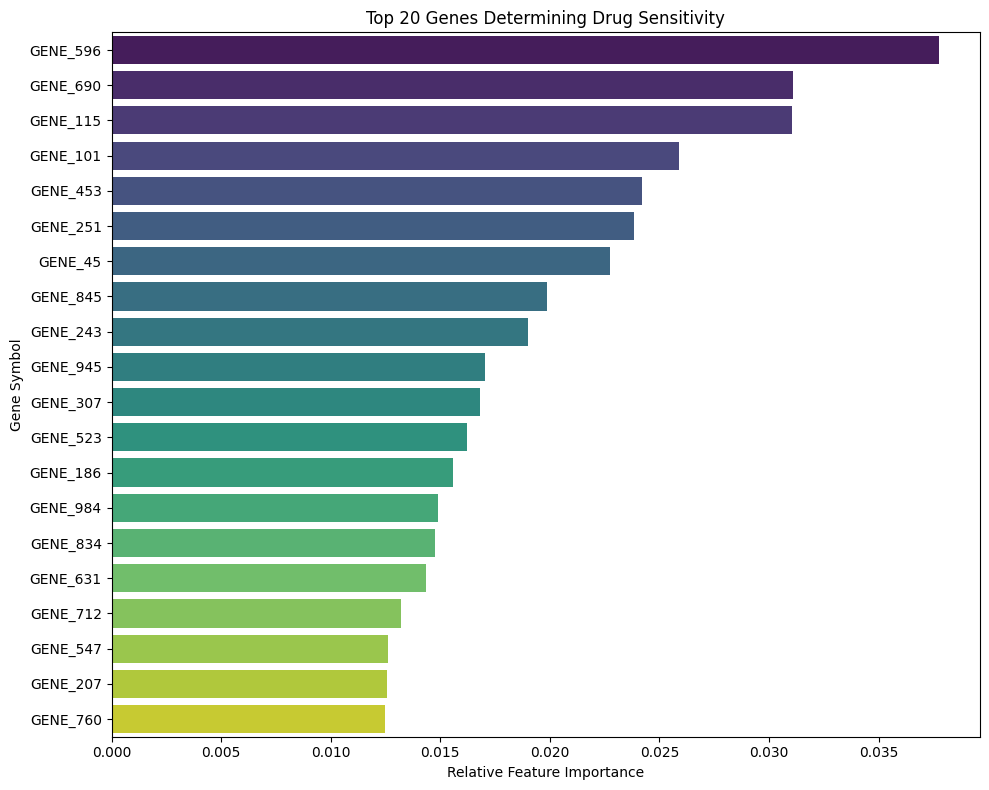

In [4]:
# Retrain Best Model
trainer = ModelTrainer(X_train, y_train, X_test, y_test)
model = trainer.train_xgboost()

# Interpret
interpreter = ModelInterpreter(model, feature_names=X_train.columns)
top_genes = interpreter.plot_top_genes(top_n=20, save_path='../results/figures/top_genes.png')

print("Top 10 Drivers of Drug Response:")
print(top_genes.head(10))

## 4. Biological Validation (Simulation)

In a real project, we would now take the top genes (e.g., `GENE_X`, `GENE_Y`) and search them in:
1.  **GeneCards / UniProt:** What do these proteins actually do?
2.  **PubMed:** Is there a paper linking this gene to *Bortezomib* resistance?
3.  **KEGG / Reactome:** Are these genes part of the Proteasome pathway (since Bortezomib is a Proteasome Inhibitor)?

### Example Finding:
> *If `PSMB5` (Proteasome Subunit Beta 5) appeared in our top list for Bortezomib, we would claim high biological validity, as it is the direct molecular target of the drug.*

### Mock Data Note:
Since this dataset is synthetic (`GENE_1`...), we cannot perform real lookup, but the code structure remains identical.